In [ ]:
TIINGO_API_KEY = 'adc377e766827e38c044cae6ede27646ccfff849'

In [ ]:
import os

In [ ]:
import pandas_datareader as pd

In [ ]:
df = pd.get_data_tiingo('GOOGL', api_key = 'adc377e766827e38c044cae6ede27646ccfff849')

In [ ]:
df.to_csv('GOOGL.csv')

In [ ]:
import pandas as prd

In [ ]:
df.head(8)

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
GOOGL  2016-05-10 00:00:00+00:00  739.38  740.00  ...      0.0          1.0
       2016-05-11 00:00:00+00:00  730.55  740.80  ...      0.0          1.0
       2016-05-12 00:00:00+00:00  728.07  735.37  ...      0.0          1.0
       2016-05-13 00:00:00+00:00  724.83  731.29  ...      0.0          1.0
       2016-05-16 00:00:00+00:00  730.30  732.68  ...      0.0          1.0
       2016-05-17 00:00:00+00:00  720.19  735.85  ...      0.0          1.0
       2016-05-18 00:00:00+00:00  721.78  725.57  ...      0.0          1.0
       2016-05-19 00:00:00+00:00  715.31  720.50  ...      0.0          1.0

[8 rows x 12 columns]

In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.head()

0    739.38
1    730.55
2    728.07
3    724.83
4    730.30
Name: close, dtype: float64

In [ ]:
df1.size

1258

In [ ]:
import matplotlib.pyplot as plt


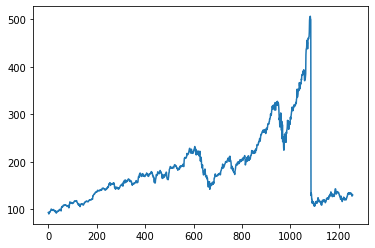

In [ ]:
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.0074083 ]
 [0.00521948]
 [0.        ]
 ...
 [0.09082381]
 [0.09476849]
 [0.09589898]]


In [ ]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)

(779, 100)


In [ ]:
print(X_train)

[[0.0074083  0.00521948 0.         ... 0.05472038 0.05678894 0.05253157]
 [0.00521948 0.         0.00043295 ... 0.05678894 0.05253157 0.05462417]
 [0.         0.00043295 0.00851473 ... 0.05253157 0.05462417 0.05334937]
 ...
 [0.25128082 0.24978954 0.24969333 ... 0.38174384 0.36788936 0.3678172 ]
 [0.24978954 0.24969333 0.24630186 ... 0.36788936 0.3678172  0.3810463 ]
 [0.24969333 0.24630186 0.24906795 ... 0.3678172  0.3810463  0.39802766]]


In [ ]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')